<a href="https://colab.research.google.com/github/chiragtyagi2003/CNN-Clasifier/blob/main/Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dependencies

In [1]:
# Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.3.0-py3-none-any.whl size=2117305 sha256=f4c2c740aa25c407ad84498c41f88dd3c6be128243964b3e96239b3f87a3f981
  Stored in directory: /root/.cache/pip/wheels/9c/9f/b5/0e31f83bc60a83625e37429f923934e26802d0d68cf3ef3216
Successfully built mitdeeplearning


Downloading the dataset

Data PreProcessing

In [28]:
# train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
# train_labels = (train_labels).astype(np.int64)
# test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
# test_labels - (test_labels).astype(np.int64)
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

print(train_images[[0]].shape)


(1, 28, 28, 1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


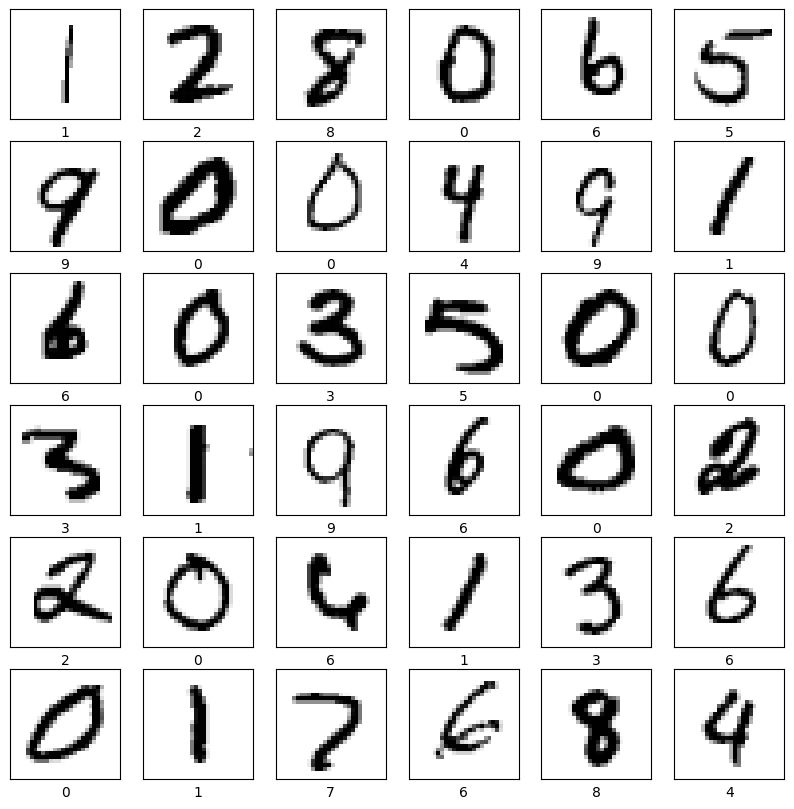

In [5]:
# plotting some of the images
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

Model 1 - simple Neural Network with two Dense layers

In [6]:
def build_first_model():
  first_model = tf.keras.Sequential([

    # layer1 => to flatten the images
    # there are no learned params in this layer
    # it only reformats the data
    tf.keras.layers.Flatten(),

    # layer2 => first dense layer
    tf.keras.layers.Dense(units=128, activation = tf.nn.relu),

    # layer3 => output layer
    tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)
  ])

  return first_model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# building the first model
model = build_first_model()


Compiling the model

In [8]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
                                                loss = 'sparse_categorical_crossentropy',
                                                metrics = ['accuracy']
                                                )

Training the model

In [14]:
# hpyerparameters
BATCH_SIZE = 64
EPOCHS = 100

model.fit(train_images, train_labels, batch_size = BATCH_SIZE, epochs = EPOCHS)

Epoch 1/100
938/938 [==============================] - 4s 4ms/step - loss: 0.3908 - accuracy: 0.8823
Epoch 2/100
938/938 [==============================] - 3s 3ms/step - loss: 0.3940 - accuracy: 0.8822
Epoch 3/100
938/938 [==============================] - 3s 3ms/step - loss: 0.3882 - accuracy: 0.8850
Epoch 4/100
938/938 [==============================] - 4s 4ms/step - loss: 0.3930 - accuracy: 0.8828
Epoch 5/100
938/938 [==============================] - 3s 3ms/step - loss: 0.3864 - accuracy: 0.8856
Epoch 6/100
938/938 [==============================] - 3s 3ms/step - loss: 0.3867 - accuracy: 0.8842
Epoch 7/100
938/938 [==============================] - 3s 3ms/step - loss: 0.3850 - accuracy: 0.8855
Epoch 8/100
938/938 [==============================] - 4s 4ms/step - loss: 0.3846 - accuracy: 0.8862
Epoch 9/100
938/938 [==============================] - 3s 3ms/step - loss: 0.3812 - accuracy: 0.8873
Epoch 10/100
938/938 [==============================] - 3s 3ms/step - loss: 0.3824 - accura

Evaluating the model1

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test Accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 44.1710 - accuracy: 0.8503
Test Accuracy:  0.8503000140190125


Define the CNN model, model2

In [18]:
def build_cnn_model():
  cnn_model = tf.keras.Sequential([

      # first conv layer
      tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation = tf.nn.relu),

      # first pooling layer
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      # second conv layer
      tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation = tf.nn.relu),

      # second pooling layer
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      # flatter layer of fully conncected network
      tf.keras.layers.Flatten(),

      # first hidden layer
      tf.keras.layers.Dense(units = 128, activation = tf.nn.relu),

      # output layer
      tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax),

  ])


  return cnn_model;

In [29]:
 #building the model
cnn_model = build_cnn_model()

#initilaze the model by passing some data through
cnn_model.predict(train_images[[0]])

print(cnn_model.summary())


1/1 [==============================] - 1s 742ms/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 24)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 36)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 900)               0         
                                                                 
 

Train the Cnn model

In [30]:
#compiling it
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
# training it
cnn_model.fit(x=train_images, y=train_labels, batch_size = 64, epochs = 5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


938/938 [==============================] - 52s 54ms/step - loss: 0.1778 - accuracy: 0.9473
Epoch 2/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0530 - accuracy: 0.9837
Epoch 3/5
938/938 [==============================] - 43s 46ms/step - loss: 0.0379 - accuracy: 0.9883
Epoch 4/5
938/938 [==============================] - 42s 45ms/step - loss: 0.0288 - accuracy: 0.9908
Epoch 5/5
938/938 [==============================] - 43s 46ms/step - loss: 0.0224 - accuracy: 0.9929


Make predictions

In [32]:
predictions = cnn_model.predict(test_images)

313/313 [==============================] - 4s 11ms/step


In [33]:
predictions[0]

array([5.93748384e-09, 1.78508071e-08, 2.96628684e-07, 1.80457590e-07,
       7.08961917e-11, 1.71611181e-09, 1.40614415e-14, 9.99998033e-01,
       1.04734532e-08, 1.25124723e-06], dtype=float32)

7


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


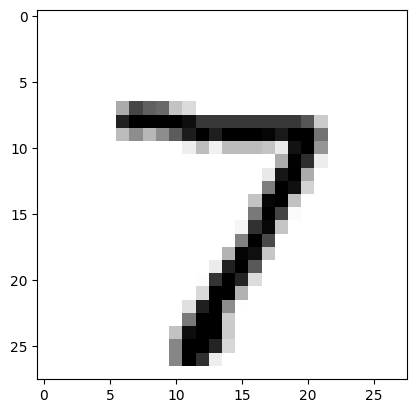

In [37]:
predicted_img0 = np.argmax(predictions[0])

print(predicted_img0)



plt.imshow(test_images[0,:,:,0], cmap = plt.cm.binary)

Visualizer

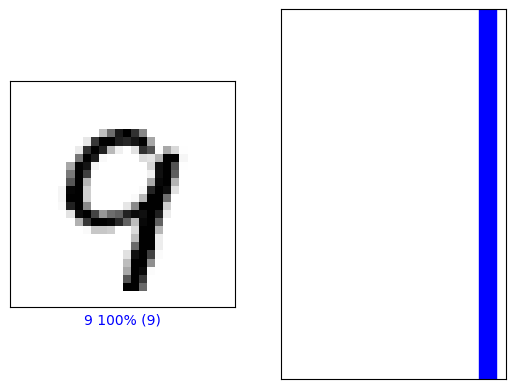

In [58]:
#@title Change the slider to look at the model's predictions! { run: "auto" }

image_index = 16 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions, test_labels)

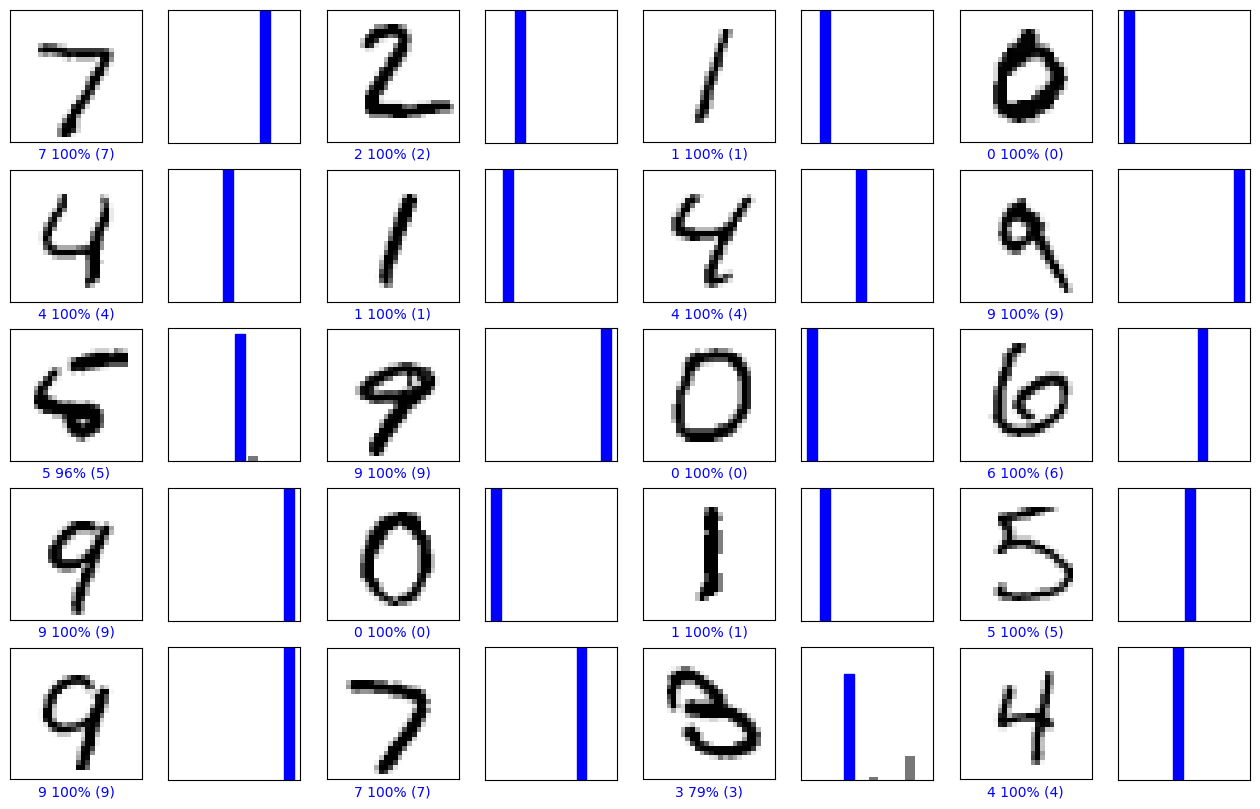

In [46]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)